# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from math import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from math import *
from statistics import *
from mpl_toolkits import mplot3d
from IPython.display import display, HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from tqdm import tqdm_notebook
from datetime import datetime
from time import time


# Réseaux de neurones supervisés 

   ## Création des données et de la relation F=aC + b + bruit

In [2]:
num_samples = 100
X = np.ones((num_samples,2))  #creer une matrice de de 100*2 rempli de 1
X[:,0] = 20*np.random.uniform(-1.,1.,num_samples)+10 # rempli la premiere colonne de valeurs entre -10 et +30 reparti uniformément
K = 20*np.random.uniform(-1.,1.,num_samples)+10
a = np.array([1.8,32])
y = X.dot(a) + np.random.normal(size=num_samples)  # on retrouve la relation y=1.8x(:,0) + 32*x(:,1) + bruit gaussien

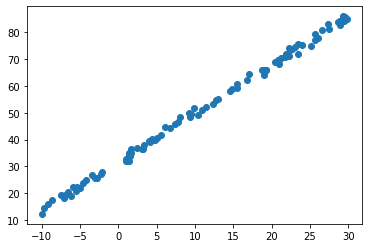

In [3]:
plt.scatter(X[:,0], y)   # plot la relation y=ax(:,0) +b

## Prétraitements

In [4]:
# Centrer réduit :
XprimCR = np.ones((num_samples,2))
XprimCR[:,0] = (X[:,0] - mean(X[:,0]))/pstdev(X[:,0]) #pstdev=ecart_type en englais
yprimCR = (y - mean(y))/pstdev(y)

#Interpolation linéaire
XprimIL = np.array([(max(X[:,0])-min(X[:,0]))*(x-min(X[:,0]))/(max(X[:,0])-min(X[:,0]))+min(X[:,0]) for x in X[:,0]])
yprimIL = np.array([(max(y)-min(y))*(Y-min(y))/(max(y)-min(y))+min(y) for Y in y])
#A voir si y doit aussi être prétraité. si oui il faut aussi mettre les fichier yprim dans le splitting

### Choix des données à utiliser :

In [5]:
#y=yprimCR
#X[:,0]=XprimCR[:,0]

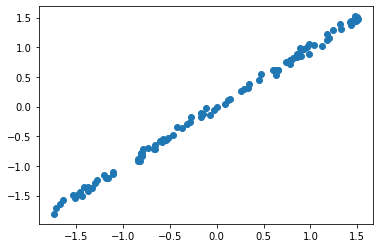

In [6]:
plt.scatter(XprimCR[:,0], yprimCR)  #on verifie que les donnees sont maintenant centrer reduit.

# Définition des datasets d'entrainement et de tests (20% des datas)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[:,0],y,test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(XprimCR,yprimCR,test_size=0.2)
X_train,X_test

(array([15.45113115, -5.97548601, 29.4464245 ,  9.4903941 , 22.21972568,
         3.13501252, -3.08769962, 11.40016835,  9.20422524, -5.55306127,
        21.80406479, 29.3473944 ,  2.37222176, 20.38718672, 26.53323188,
        23.41520481, 22.68082635, 13.05219955,  7.82067783, 25.70293747,
        23.96388184, 22.3765167 ,  4.47789946,  1.39049498, 28.64885572,
         1.59887874, -3.45278546, 27.53162223, 19.31212991,  5.00212047,
        -4.25958477,  6.73478181, 22.26557035,  1.42366904, 20.9727969 ,
        21.2579251 , 29.3304604 , 20.93390841, 29.63183763,  1.32874   ,
         5.58148664, 12.77492688, 25.09762576,  3.24637298,  3.9325541 ,
        -7.51199578, 18.87933035,  4.12524928, 14.5311395 , 19.00593169,
        -8.69094075, 26.01554683, 10.92220516, 16.83255515,  1.02352009,
        12.37852519, -2.17024646,  1.64641813,  9.93062741, -6.58554012,
        15.50642231, -9.66984653, 17.05413087, -7.1214696 , -2.27066297,
        20.86780192, 29.77753104, 23.11379417, 23.3

# Fonction de cout : mse

In [8]:
# évolution de la fonction de perte
def get_loss(a0,a1):
    theta = np.array([a0,a1]) # O1 et O2
    Y_hat = X.dot(theta)  #y^= a0x +a1
    return mse(y,Y_hat)   # erreur des moindres carrées
get_loss = np.vectorize(get_loss) # vectorise un tableau

In [9]:
# Erreur des moindres carrés
def mse(Y,Y_hat):
    return np.mean(np.square(Y_hat - Y),axis=0)

In [10]:
a0_range = np.linspace(-10,35,50)
a1_range = np.linspace(-10,35,50)
xx,yy = np.meshgrid(a0_range,a1_range)
loss_mesh = get_loss(xx,yy)

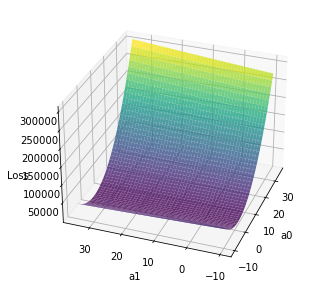

In [11]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, loss_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('a0'); ax.set_ylabel('a1'); ax.set_zlabel('Loss')
ax.view_init(30, 200)

In [12]:
plt.rc('animation', html='html5')
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(X[:,0], y, c='orange', label='Ground truth')
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# plot loss 
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(xx, yy, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([a[0]], [a[1]], [0], c='r', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=1, label='loss')
ax1.set_xlabel('a0'); ax1.set_ylabel('a1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 200)
ax1.legend()

# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='a0')
line3, = ax2.plot([],[], label='a1')
ax2.set_ylim(0, 35)
ax2.set_xlim(0, 200)
ax2.set_xlabel('iterations')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 300)

ax2.legend((line2, line3, line4), ('a0', 'a1', 'loss'), loc='center right')


fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i,s):
    line0.set_data(X[:,0], (X.dot(rec_wgts[i])))
    line1.set_data(rec_wgts[:i+1,0], rec_wgts[:i+1,1])
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    if s == 'Batch Gradient Descent' : epochno = i
    elif s == 'Stochastic Gradient Descent' : epochno = int(i/num_samples) + 1
    else : epochno = int(i/10) + 1
    ttl = fig.suptitle(f'{s}\n epoch number: = {epochno}', fontsize=20)
    line2.set_data(epochs, rec_wgts[:i+1, 0])
    line3.set_data(epochs, rec_wgts[:i+1, 1])
    line4.set_data(epochs, rec_loss[:i+1])
    return line0, line1, line2, line3, line4, ttl

## Training Loop

In [13]:
a0 = 28.  # poids
a1 = 34.  # poids

In [14]:
def train(gd_func,a0,a1):
    recorder = []
    theta = np.array([a0,a1])
    for epoch in np.arange(epochs):
        val = gd_func(theta,alpha)
        if type(val) is tuple:
            recorder.append(val)
        else :
            recorder.extend(val)
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = np.stack(rec_wgts)
    return rec_wgts, rec_loss

## Batch Gradient Descent ( works ) 

In [15]:
def gd(theta,alpha):
    Y_hat = X.dot(theta)
    loss = mse(Y_hat,y)
    prevtheta = theta.copy()
    thetagrad = np.mean(X*((Y_hat - y).reshape(-1,1)),axis=0)
    print(theta)
    theta -= thetagrad*alpha
    return prevtheta,loss

In [16]:
alpha = 0.005 #batch gradient descent, sgd, sgdm
epochs = 200
beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(gd,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 
s = "Batch Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(rec_loss))), interval=30,fargs=[s])


[28. 34.]
[-8.49368815 32.50643067]
[ 5.7747878  33.08632092]
[ 0.1962617  32.85554044]
[ 2.37752019 32.94172707]
[ 1.52485602 32.90399669]
[ 1.85839513 32.91472626]
[ 1.72815179 32.90651975]
[ 1.77923778 32.90572766]
[ 1.75942714 32.90204743]
[ 1.76733524 32.89950713]
[ 1.76440543 32.89653183]
[ 1.76571259 32.89373727]
[ 1.76536275 32.89088269]
[ 1.76566033 32.88806218]
[ 1.76570434 32.88523893]
[ 1.76584707 32.8824273 ]
[ 1.76595077 32.87962166]
[ 1.7660693  32.87682417]
[ 1.7661816  32.87403395]
[ 1.76629591 32.87125133]
[ 1.76640901 32.86847615]
[ 1.76652216 32.86570845]
[ 1.76663487 32.86294817]
[ 1.76674733 32.86019532]
[ 1.76685947 32.85744987]
[ 1.76697131 32.85471179]
[ 1.76708285 32.85198107]
[ 1.76719409 32.8492577 ]
[ 1.76730503 32.84654164]
[ 1.76741567 32.84383288]
[ 1.76752602 32.8411314 ]
[ 1.76763607 32.83843718]
[ 1.76774582 32.8357502 ]
[ 1.76785528 32.83307045]
[ 1.76796444 32.8303979 ]
[ 1.76807331 32.82773252]
[ 1.76818189 32.82507432]
[ 1.76829018 32.82242325]
[ 

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/2605716902.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(rec_loss))), interval=30,fargs=[s])


  0%|          | 0/200 [00:00<?, ?it/s]

## Stochastic Gradient Descent (Works)

In [17]:
def sgd(theta,alpha):
    rl = []
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss=(Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = X_shuff[i]*(Yi_hat - Y_shuff[i])
        theta -= thetagrad*alpha
        print(theta,i)
        rl.append((prevtheta,loss))
    return rl

In [18]:
alpha = 0.0005 #batch gradient descent, sgd, sgdm
epochs = 2
beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(sgd,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 
s = "Stochastic Gradient Descent"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[23.23051685 33.74905292] 0
[22.33874769 33.84652071] 1
[16.42165501 33.59960359] 2
[16.40573547 33.58842155] 3
[16.05583941 33.63857703] 4
[12.93179137 33.48896885] 5
[ 8.25046086 33.32689344] 6
[ 5.53535532 33.23301579] 7
[ 4.70742507 33.19334078] 8
[ 3.87381489 33.15769441] 9
[ 3.81125007 33.14985218] 10
[ 3.64301642 33.13626141] 11
[ 3.56514184 33.12780067] 12
[ 3.12653164 33.10768469] 13
[ 3.11584161 33.11019433] 14
[ 2.77699078 33.09525436] 15
[ 2.77648152 33.09547864] 16
[ 2.43111897 33.08246241] 17
[ 2.42458291 33.08037755] 18
[ 2.41586698 33.08160145] 19
[ 2.4050389 33.0793053] 20
[ 2.24341817 33.0723129 ] 21
[ 2.24506971 33.07172776] 22
[ 2.23466577 33.06986376] 23
[ 2.23310555 33.06873341] 24
[ 2.05597399 33.06167571] 25
[ 1.93805609 33.05765539] 26
[ 1.89282036 33.05589544] 27
[ 1.8755619  33.05473436] 28
[ 1.88043237 33.05385729] 29
[ 1.8794514  33.05402145] 30
[ 1.8472282  33.05292346] 31
[ 1.8457984  33.05152652] 32
[ 1.84434527 33.05057574] 33
[ 1.80437532 33.04920228] 

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/2391390542.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# Stochastic Gradient Descent With Momentum (Works)

In [19]:
def sgdm(theta,alpha):
    mu=0.24
    rl = []
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss=(Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = X_shuff[i]*(Yi_hat - Y_shuff[i])
        momentum = mu * prevtheta * alpha
        theta -= thetagrad*alpha + momentum
        print(theta, i)
        rl.append((prevtheta,loss))
    return rl

In [20]:
alpha = 0.001 #batch gradient descent, sgd, sgdm
epochs = 2

beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(sgdm,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 
s = "Stochastic Gradient Descent With Momentum"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[25.40874295 33.73158081] 0
[25.22326524 33.78703924] 1
[14.02897189 33.26580402] 2
[13.77295269 33.20139818] 3
[13.01411351 33.09872697] 4
[12.79837996 33.04157524] 5
[12.38747268 32.96705545] 6
[ 9.36931055 32.78001493] 7
[ 2.92204749 32.55068229] 8
[ 2.73036698 32.52792059] 9
[ 2.7245765  32.51794917] 10
[ 2.30426695 32.49125824] 11
[ 1.83105201 32.46740875] 12
[ 1.77366432 32.45662023] 13
[ 1.75616937 32.44719366] 14
[ 1.75451161 32.43976439] 15
[ 1.76607944 32.43029536] 16
[ 1.76607425 32.4224138 ] 17
[ 1.79123059 32.41206267] 18
[ 1.76058136 32.40310729] 19
[ 1.79333464 32.39648856] 20
[ 1.73798837 32.38636512] 21
[ 1.7417584  32.37723633] 22
[ 1.73895755 32.36898942] 23
[ 1.73649405 32.35922174] 24
[ 1.73926678 32.35097122] 25
[ 1.78812954 32.34533905] 26
[ 1.79637293 32.3385184 ] 27
[ 1.7892887  32.33040476] 28
[ 1.79205879 32.32305457] 29
[ 1.81649043 32.31626431] 30
[ 1.81348646 32.3081271 ] 31
[ 1.8212558  32.30073981] 32
[ 1.81954753 32.2920667 ] 33
[ 1.80991448 32.28388399

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/1941856530.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# AdaGrad ( Adaptive Gradient )

In [21]:
def adaGrad(theta,alpha):
    rl = []
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        somme_grad += np.square(thetagrad)
        theta -= thetagrad*alpha/(np.sqrt(somme_grad + epsilon))
        rl.append((prevtheta,loss))
        print(theta, i)
    return rl

In [22]:
alpha = 4 # adagrad
epochs = 2
beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(adaGrad,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 

s = "Adaptative Gradient Descent"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[24. 30.] 0
[22.16058466 27.79749077] 1
[20.65648997 26.02306907] 2
[20.35654387 25.27858576] 3
[18.89438572 23.71671237] 4
[17.04888027 22.08423128] 5
[16.40812424 21.20091492] 6
[15.24365996 20.05686766] 7
[15.09892902 20.46732112] 8
[14.3002359  19.58624996] 9
[14.23266741 19.35134438] 10
[14.19567748 19.55797196] 11
[14.14101984 19.34920839] 12
[13.26616867 18.47315285] 13
[13.24958378 18.6112294 ] 14
[13.22790601 18.4931095 ] 15
[13.1350161  18.23426062] 16
[13.08820972 18.45015125] 17
[13.06405544 18.32652758] 18
[12.04218525 17.43625708] 19
[11.95096991 17.199487  ] 20
[11.17949346 16.47550885] 21
[11.03139801 16.18294162] 22
[11.03178656 16.18902681] 23
[10.59496707 15.68316185] 24
[10.49209773 15.95635263] 25
[10.47505162 16.08307149] 26
[ 9.75400512 15.44965612] 27
[ 9.11503263 14.88236073] 28
[ 9.03751903 14.7068213 ] 29
[ 8.88908954 14.4599973 ] 30
[ 8.88998541 14.48256682] 31
[ 8.61299458 14.14073482] 32
[ 8.61415093 14.1593598 ] 33
[ 8.49429673 13.94715463] 34
[ 8.2271574

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/4246422848.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# RMSProp (Root Mean Square Propagation)

In [23]:
def rmsProp(theta,alpha):
    rl = []
    E=0
    rho=0.9
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        E=rho*E + (1-rho)*(thetagrad**2)
        theta -= thetagrad*alpha/(np.sqrt(E + epsilon))
        rl.append((prevtheta,loss))
        print(theta,i)
    return rl


In [24]:
alpha = 0.5 # rmsprop
epochs = 2
beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(rmsProp,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 
s = "Root Mean Square Propagation"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[26.41886117 32.41886117] 0
[26.33976846 32.07480685] 1
[24.95554166 30.80811087] 2
[24.92628142 30.99198723] 3
[23.86448527 29.98424297] 4
[23.13701159 29.21001584] 5
[22.82666931 28.72118622] 6
[22.24735965 28.07730336] 7
[22.13810892 28.35903681] 8
[22.11347405 28.22540101] 9
[21.40802324 27.52262726] 10
[21.35872647 27.71299744] 11
[20.8449688  27.12485394] 12
[20.74733897 26.87092279] 13
[20.64627222 27.14015958] 14
[20.22327617 26.60979924] 15
[19.59103618 25.98053085] 16
[18.90616558 25.34302734] 17
[18.90475889 25.31853212] 18
[18.84675112 25.51437458] 19
[18.72589089 25.23914681] 20
[18.67485493 25.06026621] 21
[18.46868599 24.69439849] 22
[18.45091732 24.58996425] 23
[17.90405121 23.99230434] 24
[16.98739838 23.23162071] 25
[16.97558115 23.32536855] 26
[16.19581468 22.63571979] 27
[15.55091815 22.03145738] 28
[15.48206868 21.84084877] 29
[15.27102782 21.49918136] 30
[14.94928221 21.07799422] 31
[14.3933388 20.5295124] 32
[14.38397148 20.61157992] 33
[14.24649934 20.34001258] 

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/1562408200.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# ADAM (Adaptive Moment Estimation)

In [25]:
def adam(theta,alpha):
    rl = []
    m=0
    v=0
    b1=0.9  #decay factor
    b2=0.999
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        m=b1*m +(1-b1)*thetagrad
        v=b2*v +(1-b2)*(thetagrad**2)
        m_hat=m/(1-b1)
        v_hat=v/(1-b2)
        theta -= m_hat*alpha/(np.sqrt(v_hat)+epsilon)
        rl.append((prevtheta,loss))
        print(theta,i)
    return rl


In [26]:
alpha = 0.38 # adam
epochs = 2
beforeCalcul = datetime.now()
rec_wgts,rec_loss = train(adam,a0,a1)
afterCalcul = datetime.now()
print(str((afterCalcul-beforeCalcul).total_seconds()) + " secondes") 
s = "Adam"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[27.62 33.62] 0
[27.19958933 33.14662685] 1
[26.70691507 32.58824475] 2
[26.15327685 31.96774455] 3
[25.6350655  31.35319783] 4
[25.1606692  30.76372472] 5
[24.66731494 30.14370119] 6
[24.22138103 29.56916227] 7
[23.81595578 29.02809777] 8
[23.4496375 28.5270042] 9
[22.96207957 27.94935362] 10
[22.5199201  27.45246522] 11
[21.9696341  26.87241969] 12
[21.34610135 26.23056108] 13
[20.75366698 25.59519709] 14
[20.19741838 24.97453828] 15
[19.63315869 24.34004173] 16
[19.0034055  23.66651349] 17
[18.34060669 22.97265082] 18
[17.64813312 22.26243498] 19
[16.99936479 21.57925959] 20
[16.40197202 21.00330558] 21
[15.81374192 20.42538601] 22
[15.2033236  19.83168811] 23
[14.64770711 19.32070196] 24
[14.14728463 18.85892551] 25
[13.6944448  18.43221442] 26
[13.22907675 17.99028169] 27
[12.80403185 17.61438407] 28
[12.42128025 17.27557367] 29
[12.03108462 16.92175958] 30
[11.67831325 16.59584574] 31
[11.28628056 16.24189626] 32
[10.93331627 15.92388608] 33
[10.58768648 15.60284981] 34
[10.27293

C:\Users\axelc\AppData\Local\Temp/ipykernel_1820/180386715.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]